In [1]:
import glob
import pandas as pd
path = r"1\20180402"
allFiles = glob.glob(path+"\*.DAT")
list=[]
for filename in allFiles:
    df = pd.read_csv(filename, header = None)
    list.append(df)
a = pd.concat(list)

In [2]:
a = a.iloc[:,[0,1,2,4,8]]

In [3]:
a = a.rename(columns = {0:'id', 1:'longtitude', 2:'latitude', 4:'timestamp', 8:'assigned'})

In [4]:
a = a.sort_values(['id', 'timestamp']).reset_index(drop=True)
a2 = pd.DataFrame(a.shift(periods=-1, axis=0))
a3 = a.merge(a2, left_index=True, right_index=True, suffixes=('_prev', '_curr'))

In [5]:
a5 = a3[((a3['assigned_prev'] == 0) & (a3['assigned_curr'] == 1)) | ((a3['assigned_prev'] == 1) & (a3['assigned_curr'] == 0))]

In [6]:
a6 = a5[['id_curr','longtitude_curr','latitude_curr','timestamp_curr','assigned_curr']]

In [7]:
a6 = a6.rename(columns = {'id_curr':'id', 'longtitude_curr':'longitude', 'latitude_curr':'latitude', 'timestamp_curr':'timestamp', 'assigned_curr':'assigned'})

In [8]:
a7 = pd.DataFrame(a6.shift(periods=-1, axis=0))
a8 = a6.merge(a7, left_index=True, right_index=True, suffixes=('_on', '_off'))

In [9]:
a8 = a8[(a8['id_on'] == a8['id_off'])]

In [10]:
a8 = a8[(a8['id_on'] == a8['id_off'])]

In [11]:
a8 = a8[(a8['assigned_on'] == 1) & (a8['assigned_off'] == 0)]

In [12]:
a8.head()

,id_on,longitude_on,latitude_on,timestamp_on,assigned_on,id_off,longitude_off,latitude_off,timestamp_off,assigned_off
1,180000826.0,1.271711e+09,375462115.0,2.018040e+13,1.0,180000826.0,1.271040e+09,375215805.0,2.018040e+13,0.0
218,180000826.0,1.271327e+09,375444505.0,2.018040e+13,1.0,180000826.0,1.271399e+09,375336865.0,2.018040e+13,0.0
305,180002092.0,1.270579e+09,374846235.0,2.018040e+13,1.0,180002092.0,1.270650e+09,375440965.0,2.018040e+13,0.0
773,180003216.0,1.271268e+09,374700155.0,2.018040e+13,1.0,180003216.0,1.271371e+09,374633415.0,2.018040e+13,0.0
890,180003216.0,1.271258e+09,374786065.0,2.018040e+13,1.0,180003216.0,1.271226e+09,374947685.0,2.018040e+13,0.0


In [13]:
b = a8.loc[:,['longitude_on','latitude_on','longitude_off','latitude_off']]

In [14]:
a8['latitude_on'] = a8['latitude_on']/10000000
a8['longitude_on'] = a8['longitude_on']/10000000
a8['latitude_off'] = a8['latitude_off']/10000000
a8['longitude_off'] = a8['longitude_off']/10000000
a8 = a8[(a8['latitude_on']>30) & (a8['longitude_on']>120)]
a8 = a8[(a8['latitude_off']>30) & (a8['longitude_off']>120)]

In [15]:
a8.iloc[0,3]

20180402075814.0

In [16]:
on_time=[20180402080000,20180402080500,20180402081000,20180402081500,20180402082000,20180402082500,20180402083000,20180402083500,20180402084000,20180402084500,20180402085000,20180402085500,20180402090000]
off_time=[20180402080000,20180402080500,20180402081000,20180402081500,20180402082000,20180402082500,20180402083000,20180402083500,20180402084000,20180402084500,20180402085000,20180402085500,20180402090000]

,id_on,longitude_on,latitude_on,timestamp_on,assigned_on,id_off,longitude_off,latitude_off,timestamp_off,assigned_off
1,180000826.0,127.171070,37.546211,2.018040e+13,1.0,180000826.0,127.103983,37.521580,2.018040e+13,0.0
218,180000826.0,127.132700,37.544451,2.018040e+13,1.0,180000826.0,127.139923,37.533687,2.018040e+13,0.0
305,180002092.0,127.057941,37.484623,2.018040e+13,1.0,180002092.0,127.065031,37.544097,2.018040e+13,0.0
773,180003216.0,127.126844,37.470016,2.018040e+13,1.0,180003216.0,127.137096,37.463341,2.018040e+13,0.0
890,180003216.0,127.125795,37.478606,2.018040e+13,1.0,180003216.0,127.122624,37.494768,2.018040e+13,0.0


In [18]:
len(a8)

44863

In [23]:
a8['on_distribution']=0
a8['off_distribution']=0

In [24]:
for i in range(44863):
    for j in range(12):
        if on_time[j]<=a8.iloc[i,3]<on_time[j+1]:
            a8.iloc[i,10]+=j
    for k in range(12):
        if off_time[k]<=a8.iloc[i,8]<off_time[k+1]:
            a8.iloc[i,11]+=k

In [35]:
b = a8.groupby('on_distribution').count()

In [26]:
import matplotlib.pyplot as plt

In [36]:
b.head()

,id_on,longitude_on,latitude_on,timestamp_on,assigned_on,id_off,longitude_off,latitude_off,timestamp_off,assigned_off,off_distribution
on_distribution,,,,,,,,,,,
0,9991,9991,9991,9991,9991,9991,9991,9991,9991,9991,9991
1,3758,3758,3758,3758,3758,3758,3758,3758,3758,3758,3758
2,3927,3927,3927,3927,3927,3927,3927,3927,3927,3927,3927
3,3831,3831,3831,3831,3831,3831,3831,3831,3831,3831,3831
4,3787,3787,3787,3787,3787,3787,3787,3787,3787,3787,3787


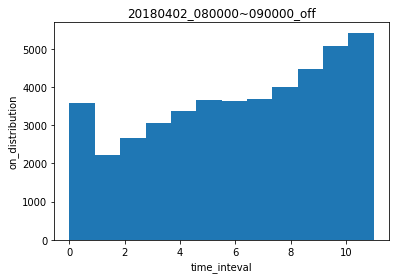

In [45]:
plt.hist(a8['off_distribution'],bins=12)
plt.xlabel('time_inteval')
plt.ylabel('on_distribution')
plt.title('20180402_080000~090000_off')
plt.show()

(array([ 5813.,  2664.,  3048.,  3372.,  3651.,  3646.,  3700.,  3991.,
         4471., 10507.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

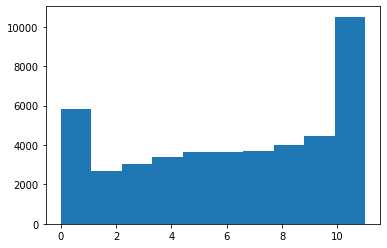

In [40]:
plt.hist(a8['off_distribution'])

In [43]:
b1 = a8.groupby('off_distribution').count()
b1

,id_on,longitude_on,latitude_on,timestamp_on,assigned_on,id_off,longitude_off,latitude_off,timestamp_off,assigned_off,on_distribution
off_distribution,,,,,,,,,,,
0,3581,3581,3581,3581,3581,3581,3581,3581,3581,3581,3581
1,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232,2232
2,2664,2664,2664,2664,2664,2664,2664,2664,2664,2664,2664
3,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
4,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372
5,3651,3651,3651,3651,3651,3651,3651,3651,3651,3651,3651
6,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646
7,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700
8,3991,3991,3991,3991,3991,3991,3991,3991,3991,3991,3991
